# Minimum Spanning Tree
Given a graph $G$ with weighted edges, we can define the _mimimum spanning tree_ (MST) of the graph.  
The MST (denoted as $T^*$) of a graph is a tree that connects every node in graph G with the smallest edge weights possible.  
> A tree $T $ is defined as a graph without any cycles.
### Key Properties of MST
1. __Cut Property:__ Any two subtrees of $T^*$ will be connected through the minimum weight edge in G 
2. __Cycle Property:__ Any cycle present in G cannot be present in $T^*$. The highest weight edge of a cycle in graph $G$ must be excluded. 

In [23]:
import numpy
import networkx
def draw(g):
    pos = networkx.circular_layout(g) # Arrange the nodes display in a circle
    import pylab as P
    edge_labels = dict( [(e,A[e[0], e[1]]) for e in g.edges() ])
    networkx.draw_networkx(g, pos=pos, with_label=True, node_color='white')
    networkx.draw_networkx_edge_labels(g, pos=pos, edge_labels=edge_labels)
    P.show
    
def draw_mst(g, unweighted_mst_edges):  
    import pylab as P
    pos = networkx.circular_layout(g)
    networkx.draw_networkx(g, pos=pos, with_label=True, node_color='white')
    
    t_star = networkx.from_edgelist(unweighted_mst_edges)
    
    networkx.draw_networkx_edges(t_star, pos=pos, node_color='white', width=5)
    edge_labels = dict( [(e,A[e[0], e[1]]) for e in g.edges() ])
    networkx.draw_networkx_edge_labels(g, pos=pos, edge_labels=edge_labels)
    P.show

[[ 0  9 70 65 81]
 [ 9  0 88 39 37]
 [70 88  0 87 25]
 [65 39 87  0 77]
 [81 37 25 77  0]]


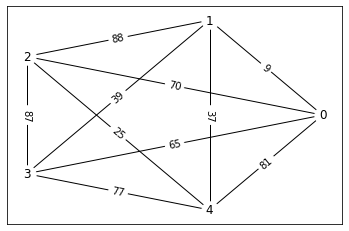

In [39]:
numpy.random.seed(0)
# Create an adjacency matrix to play with
n=5
A = numpy.random.randint(0,100,(n,n))
for i in range(n):
    # Make distance to self 0
    A[i,i] = 0
    # Make distance of i to j = j to i 
    # Make into undirected graph
    for j in range(i+1, n):
        A[i,j] = A[j,i]
print(A)
draw(networkx.from_numpy_matrix(A))

## Prim's Algorithm
Prims algorithm is based on the _cut property_
1. Include an arbitrary node $a$ in $T^*$
2. The cut between $\{a\}$ and all other nodes $V \diagdown \{a\}$ 
## TODO 

## Node Centric Prim's Algorithm
### Method
Start with an abitrary node,

### Runtime
$$O(n^2)$$
Prim's Algorithm cannot run substantially faster than roughly $\frac{n^2}{2}$ because it must load an input matrix of $n \times n$ weights (or $\frac{1}{2}$ when the graph is undirected).  For this reason, Prim' Algorithm is $\in \Omega(n^2)$ and thus, $\in \Theta(n^2)$

MST cost 119
[(9, 0, 1), (9, 1, 0), (37, 1, 4), (25, 4, 2), (39, 1, 3)]


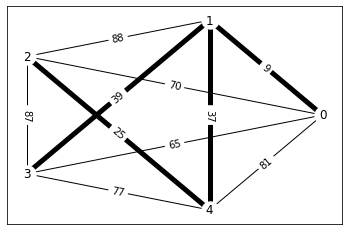

In [45]:
# Node Centric Prim's Algorithm
# Input graph A
mst_edges = []
nodes_used = set([0])
nodes_not_used = set([ i for i in range(n)])        

best_edge_between_used_and_each_node_not_used = [None]*n
for i in nodes_not_used:
    best_edge_between_used_and_each_node_not_used[i]=(A[0,i], (0,i))
best_edge_between_used_and_each_node_not_used[0] = (numpy.inf, (-1, -1))

# In each iteration grow the included nodes (nodes_used) to the next node connected
while len(nodes_used) != n: # Have we used all of them?
    best_dist, (node_used, node_not_yet_used) = min(best_edge_between_used_and_each_node_not_used)
    mst_edges.append( (A[node_used, node_not_yet_used], node_used, node_not_yet_used) )
    
    nodes_used.add(node_not_yet_used)
    nodes_not_used.remove(node_not_yet_used)
    
    # add edges from node_not_yet_used to all the remaining unused nodes:
    for i in nodes_not_used:
        if A[node_not_yet_used, i] < best_edge_between_used_and_each_node_not_used[i][0]:
            best_edge_between_used_and_each_node_not_used[i] = (A[node_not_yet_used, i], (node_not_yet_used, i))
            
    best_edge_between_used_and_each_node_not_used[node_not_yet_used] = (numpy.inf, (-1, -1))
    
print ('MST cost', sum( [e[0] for e in mst_edges]))
print (mst_edges)
g = networkx.from_numpy_matrix(A)
draw_mst(g, [ (e[1],e[2]) for e in mst_edges] )

# Kruskall's Algorithm
### Method
1. Sort edges by weight
2. Check if each new edge would introduce a cycle, use the __union-find__ or __disjoint set__ data structure

### Runtime
The cost of Kruskall's algorithm will be the cost of sorting the edges in graph $G$ by weight and then the cost of linearly progressing through the edges. We know the optimal runtime of sorting each edge will be $\in \Theta(|E|\cdot log(|E|))$, where $|E|$ is the number of edges.   
We must also check whether each new edge would introduce a cycle.
  
The __union-find__ data structure has space/time complexity $O(log^*(n))$ ($log^*$ is the iterative logarithm, the number of times $log$ must be applied before $n$ becomes 1. For the number of particles in the univers $n \approx 2^{270} $, $log^*(n) < 5$).  
  
The worst case runtime $\in O(n^2log(n^2)) = O(n^2log(n))$


In [43]:
# The _disjoint set_ data structure is required for Kruskall's Algorithm
class DisjointSet():

    # create one with a unique value:
    def __init__(self, val):
        self.value = val
        self.parent = self
        
        # attribute is only valid at root nodes:
        self.rank = 1
        
    def find_root(self):
        if self.parent != self:
            # Path compression:
            # When finding the root flatten the tree as you go up
            # the distance to the root will shrink
            root = self.parent.find_root()
            self.parent = root
            return root
        return self
    
    def union_with(self, rhs):
        root = self.find_root()
        rhs_root = rhs.find_root()
        
        if root != rhs_root:
            # Not in the same tree and need to unite:
            if root.rank < rhs_root.rank:
                # add self to rhs's tree
                root.parent = rhs_root
            elif root.rank > rhs_root.rank:
                rhs_root.parent = root
            else:
                # add rhs to self's tree and increase rank
                rhs_root.parent = root
                root.rank += 1 

MST cost 110
[(9, 0, 1), (25, 2, 4), (37, 1, 4), (39, 1, 3)]


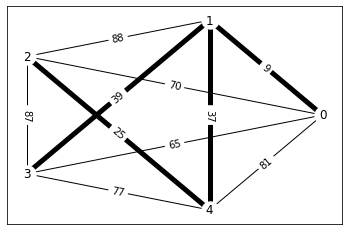

In [44]:
# Kruskall's Algorithm Demo
# Input graph A
mst_edges = []

# Sorting the weights of the edges
edges = [ (A[i,j],i,j) for i in range(n) for j in range(n) if i != j ]
ascending_edges = sorted(edges)

connected_graphs = [DisjointSet(i) for i in range(n)]
for e in ascending_edges:
    weight,i,j = e
    if connected_graphs[i].find_root() != connected_graphs[j].find_root():
        # This edge does not introduce a loop, so it can be added:
        mst_edges.append(e)
        connected_graphs[i].union_with(connected_graphs[j])

print ('MST cost', sum( [e[0] for e in mst_edges]))
print (mst_edges)
g = networkx.from_numpy_matrix(A)
draw_mst(g, [ (e[1],e[2]) for e in mst_edges] )

# The Traveling Salesman Problem
The "Traveling Salesman Problem" (TSP) defines the task of finding the __Hamiltonian path__ with minimum tota weight (we will denote this path as $P^*$). 
> It is currently unknown if an efficient and exact solution to the TSP is even possible on an arbitrary graph.
 
## Method
The brute force method has a runtime in $O(n!)$  
* Because we try all possible orderings of verticies 

## 2-Approximation Method
We can arrive at a _decent_ solution faster by using __MST__ to approximate __TSP__.  
Observe that $paths(G) \subset trees(G)$  
implying that $cost(T^*) \le cost(P^*)$
#TODO